<a href="https://colab.research.google.com/github/Sirius724/Computational-Physics/blob/main/%EC%A0%84%EC%82%B0%EB%AC%BC%EB%A6%AC%ED%95%99_9_%EB%AC%B4%EC%9E%91%EC%9C%84_%EC%88%98%2C_Brownian_motion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sys import exit 
import time
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/전산 물리학"
data = "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data"
import os
import numpy as np ; import math as mt
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import random as rn

%matplotlib inline

if not os.path.isdir(data): 
    os.makedirs(data)

Mounted at /content/drive


# Random Number
## random, randint, randn

## random number generator
### np.random.random, randint, randn VS random, randint

In [ ]:
# random() -> 0, 1.0 사이의 실수 생성
a=(rn.random()) 
b=(np.random.random())

print(f"{a:.4f},{b:.4f}")



0.9550,0.0238


In [ ]:
a = rn.randint(5,10)  # 5 이상 10 이하의 정수 생성
b = np.random.randint(5,10) # 5이상 10 미만의 정수 생성

print(f"{a:.4f},{b:.4f}")

10.0000,8.0000


In [ ]:
# np.random.randn() -> standard normal distribution number generator = gaussian distribution
b = np.random.randn()

print(f"{b:.4f}")


# N(mu, sigma^2) -> sigma * np.random.randn() + mu
c = 10*np.random.randn()+10
print(f"{c:.4f}")


0.5083
14.3526


## Most important different thing between np.random and random 
### -> np.random can create list of random number

In [ ]:
from numpy import random
print(random.random(size=(2,2)))
print(random.randint(1,10,size=(2,2)))
print(random.randn(2,2)) # list 생성시 size 안적음

[[0.34043196 0.41166309]
 [0.45337817 0.87156123]]
[[2 9]
 [1 2]]
[[ 0.54924292  0.30560818]
 [ 0.57533241 -0.66671907]]


### Can we sure gaussian number?
### -> Check out!!

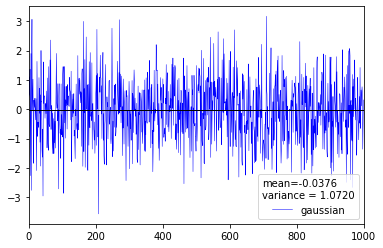

In [51]:
a = random.randn(1000)
plt.plot(a,linewidth=0.5,label = "gaussian",c="b")
plt.xlim(0,len(a))
plt.legend(title = f"mean={a.mean():.4f}\nvariance = {a.var():.4f}") # mean, variance
plt.axhline(a.mean(),xmin=0,xmax=1000,linewidth=1,c="k")
plt.show()

# Brownian Motion

$$ \frac{dv}{dt} = \frac{\zeta}{m}\cdot v + \delta \frac{F(t)}{m} \\
\left<v(t)^2\right>_{t=∞} = \frac{k_B T}{m}\\
\left<x(t)^2\right>_{t=∞} = 2Dt → D = \frac{k_B T}{\zeta}$$




## 2D Brownian motion
### Use euler method

In [56]:
from numpy import random
dt = 1 #time interval
t = np.arange(0,1000,dt) # total step
m = 0.1 #mass
zeta = 0.1 #zeta
x = np.zeros(len(t));y = np.zeros(len(t)) # x, y array create
vx = np.zeros(len(t)); vy = np.zeros(len(t))

def velocity(x, v):
    vel = -zeta/m*v + random.randn()/m
    return vel
    
def position(x,v):
    pos = v
    return pos

save = open(f"{data}/brownian_Euler.txt","w+")
save.write(f"{t[0]}\t{x[0]}\t{vx[0]}\t{y[0]}\t{vy[0]}\n")

for i in range(len(t)-1):
    vx[i+1] = vx[i] + velocity(x[i],vx[i])*dt
    x[i+1] = x[i] + position(x[i],vx[i])*dt
    vy[i+1] = vy[i] + velocity(y[i],vy[i])*dt
    y[i+1] = y[i] + position(x[i],vy[i])*dt
    save.write(f"{t[i]}\t{x[i+1]}\t{vx[i+1]}\t{y[i+1]}\t{vy[i+1]}\n")
    
save.close()

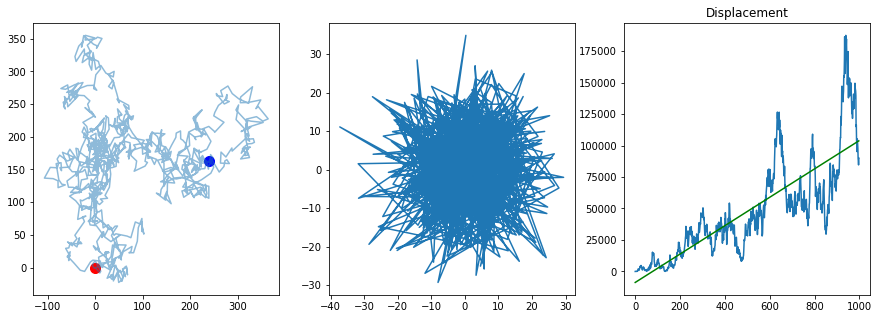

In [64]:
result = pd.read_csv(f"{data}/brownian_Euler.txt", sep='\t',header=None,engine="python")

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
plt.plot(result[1],result[3],alpha=0.5)
plt.scatter(result[1][0],result[3][0],c="red",s=100)
plt.scatter(result[1].iloc[-1],result[3].iloc[-1],c="b",s=100)

ax2 = fig.add_subplot(1,3,2)
plt.plot(result[2],result[4])

ax3 = fig.add_subplot(1,3,3)
dsq = []
sum = 0
for i in range(len(result[0])-1):
    dsq.append((result[1][i])**2+result[3][i]**2)
    
plt.plot(dsq)
linear_model=np.polyfit(result[0][:len(dsq)],dsq,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,result[0].max())
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.title("Displacement")
plt.show()

### Use RK4 method

In [59]:
from numpy import random
dt = 1 #time interval
t = np.arange(0,1000,dt) # total step
m = 0.1 #mass
zeta = 0.1 #zeta
x = np.zeros(len(t));y = np.zeros(len(t)) # x, y array create
vx = np.zeros(len(t)); vy = np.zeros(len(t))

def velocity(x, v):
    vel = -zeta/m*v + random.randn()/m
    return vel
    
def position(x,v):
    pos = v
    return pos

save = open(f"{data}/brownian_RK4.txt","w+")
save.write(f"{t[0]}\t{x[0]}\t{vx[0]}\t{y[0]}\t{vy[0]}\n")

for i in range(len(t)-1):
    k1 = dt*velocity(x[i],vx[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*position(x[i],vx[i]) # k1 = dx*f(xn,yn,zn)
    k2 = dt*velocity(x[i]+l1/2,vx[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*position(x[i]+l1/2,vx[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*velocity(x[i]+l2/2,vx[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*position(x[i]+l2/2,vx[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*velocity(x[i]+l3,vx[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*position(x[i]+l3,vx[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    vx[i+1] = vx[i] + (k1+2*k2+2*k3+k4)/6
    x[i+1] = x[i] + (l1+2*l2+2*l3+l4)/6

    k1 = dt*velocity(y[i],vy[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*position(y[i],vy[i]) # k1 = dx*f(xn,yn,zn)
    k2 = dt*velocity(y[i]+l1/2,vy[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*position(y[i]+l1/2,vy[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*velocity(y[i]+l2/2,vy[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*position(y[i]+l2/2,vy[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*velocity(y[i]+l3,vy[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*position(y[i]+l3,vy[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    vy[i+1] = vy[i] + (k1+2*k2+2*k3+k4)/6
    y[i+1] = y[i] + (l1+2*l2+2*l3+l4)/6
    save.write(f"{t[i]}\t{x[i+1]}\t{vx[i+1]}\t{y[i+1]}\t{vy[i+1]}\n")
    
save.close()

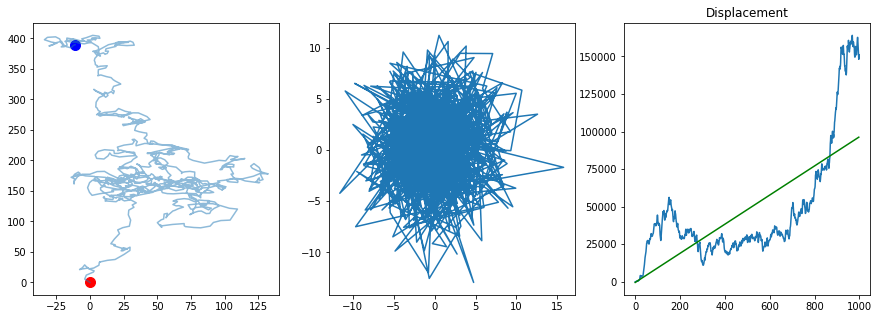

In [63]:
result2 = pd.read_csv(f"{data}/brownian_RK4.txt", sep='\t',header=None,engine="python")

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
plt.plot(result2[1],result2[3],alpha=0.5)
plt.scatter(result2[1][0],result2[3][0],c="red",s=100)
plt.scatter(result2[1].iloc[-1],result2[3].iloc[-1],c="b",s=100)

ax2 = fig.add_subplot(1,3,2)
plt.plot(result2[2],result2[4])

ax3 = fig.add_subplot(1,3,3)
dsq = []
sum = 0
for i in range(len(result2[0])-1):
    dsq.append((result2[1][i])**2+result2[3][i]**2)
    
plt.plot(dsq)
linear_model=np.polyfit(result2[0][:len(dsq)],dsq,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,result2[0].max())
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.title("Displacement")
plt.show()

## 1D Brownian motion
### Single Run

In [27]:
# Use euler method

from numpy import random
dt = 1 #time interval
t = np.arange(0,1000,dt) # total step
m = 1 #mass
zeta = 0.1 #zeta
x = np.zeros(len(t)); # x array create
vx = np.zeros(len(t))

def velocity(x, v):
    vel = -zeta/m*v + random.randn()/m
    return vel
    
def position(x,v):
    pos = v
    return pos

save = open(f"{data}/brownian_Euler_1D.txt","w+")
save.write(f"{t[0]}\t{x[0]}\t{vx[0]}\n")

for i in range(len(t)-1):
    vx[i+1] = vx[i] + velocity(x[i],vx[i])*dt
    x[i+1] = x[i] + position(x[i],vx[i])*dt
   
    save.write(f"{t[i]}\t{x[i+1]}\t{vx[i+1]}\n")
    
save.close()

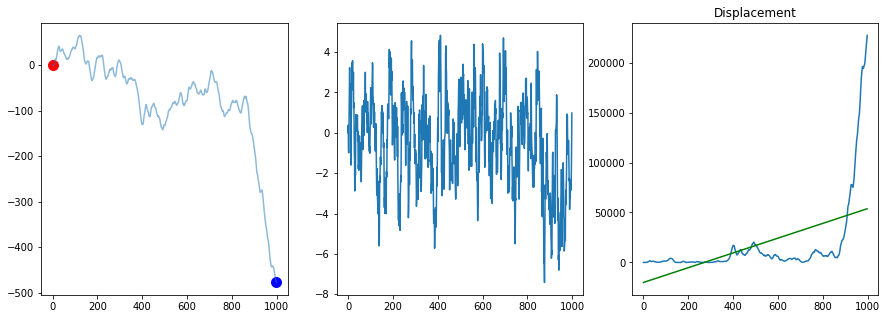

In [28]:
result_1D = pd.read_csv(f"{data}/brownian_Euler_1D.txt", sep='\t',header=None,engine="python")

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
plt.plot(result_1D[0],result_1D[1],alpha=0.5)
plt.scatter(result_1D[0][0],result_1D[0][1],c="red",s=100)
plt.scatter(result_1D[0].iloc[-1],result_1D[1].iloc[-1],c="b",s=100)

ax2 = fig.add_subplot(1,3,2)
plt.plot(result_1D[0],result_1D[2])

ax3 = fig.add_subplot(1,3,3)
dsq = []
sum = 0
for i in range(len(result_1D[0])-1):
    dsq.append((result_1D[1][i])**2)
    
plt.plot(dsq)
linear_model=np.polyfit(result_1D[0][:len(dsq)],dsq,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,result_1D[0].max())
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.title("Displacement")
plt.show()

In [24]:
# Use RK4 method

from numpy import random
dt = 1 #time interval
t = np.arange(0,10000,dt) # total step
m = 0.1 #mass
zeta = 0.1 #zeta
x = np.zeros(len(t)) # x array create
vx = np.zeros(len(t))

def velocity(x, v):
    vel = -zeta/m*v + random.randn()/m
    return vel
    
def position(x,v):
    pos = v
    return pos

save = open(f"{data}/brownian_RK4_1D.txt","w+")
save.write(f"{t[0]}\t{x[0]}\t{vx[0]}\n")

for i in range(len(t)-1):
    k1 = dt*velocity(x[i],vx[i]) # k1 = dx*f(xn,yn,zn)
    l1 = dt*position(x[i],vx[i]) # k1 = dx*f(xn,yn,zn)
    k2 = dt*velocity(x[i]+l1/2,vx[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    l2 = dt*position(x[i]+l1/2,vx[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
    k3 = dt*velocity(x[i]+l2/2,vx[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    l3 = dt*position(x[i]+l2/2,vx[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
    k4 = dt*velocity(x[i]+l3,vx[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    l4 = dt*position(x[i]+l3,vx[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
    vx[i+1] = vx[i] + (k1+2*k2+2*k3+k4)/6
    x[i+1] = x[i] + (l1+2*l2+2*l3+l4)/6
    save.write(f"{t[i]}\t{x[i+1]}\t{vx[i+1]}\n")
    
save.close()

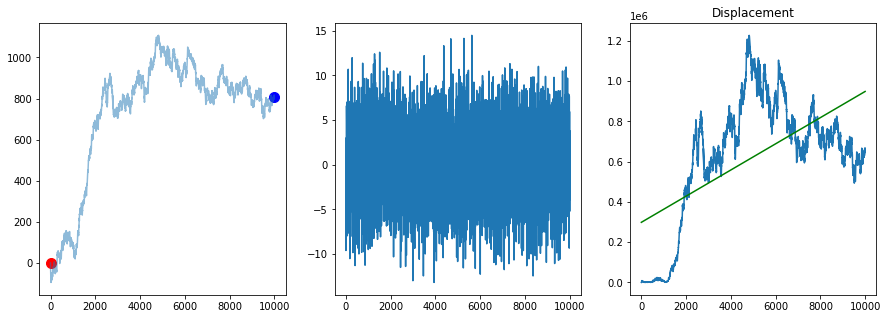

In [25]:
result_1D_Rk4 = pd.read_csv(f"{data}/brownian_RK4_1D.txt", sep='\t',header=None,engine="python")

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,3,1)
plt.plot(result_1D_Rk4[0],result_1D_Rk4[1],alpha=0.5)
plt.scatter(result_1D_Rk4[0][0],result_1D_Rk4[0][1],c="red",s=100)
plt.scatter(result_1D_Rk4[0].iloc[-1],result_1D_Rk4[1].iloc[-1],c="b",s=100)

ax2 = fig.add_subplot(1,3,2)
plt.plot(result_1D_Rk4[0],result_1D_Rk4[2])

ax3 = fig.add_subplot(1,3,3)
dsq = []
sum = 0
for i in range(len(result_1D_Rk4[0])-1):
    dsq.append((result_1D_Rk4[1][i])**2)
    
plt.plot(dsq)
linear_model=np.polyfit(result_1D_Rk4[0][:len(dsq)],dsq,1)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(0,result_1D_Rk4[0].max())
plt.plot(x_s,linear_model_fn(x_s),color="green")
plt.title("Displacement")
plt.show()

## Repetition Run

In [158]:
 def brownian_display_1D(t,x,v,dsq,v2,file):
    #result_1D = pd.read_csv(f"{file}", sep='\t',header=None,engine="python")
    
    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(1,4,1)
    plt.plot(t,x,alpha=0.5)
    plt.xlim(0,t.max())
    plt.scatter(t[0],x[0],c="red",s=100)
    plt.scatter(t[-1],x[-1],c="b",s=100)
    plt.title("x(t)")

    ax2 = fig.add_subplot(1,4,2)
    plt.plot(t,v)
    plt.xlim(0,t.max())
    plt.title("v_x(t)")

    ax3 = fig.add_subplot(1,4,3)
    plt.plot(t,dsq)
    plt.xlim(0,t.max())
    linear_model=np.polyfit(t,dsq,1)
    linear_model_fn=np.poly1d(linear_model)
    x_s=np.arange(0,t.max())
    plt.plot(x_s,linear_model_fn(x_s),color="red")
    plt.title("<x(t)^2>")

    ax4 = fig.add_subplot(1,4,4)
    plt.plot(t,v2)
    plt.xlim(0,t.max())
    #linear_model=np.polyfit(t,dsq,1)
    #linear_model_fn=np.poly1d(linear_model)
    #x_s=np.arange(0,t.max())
    #plt.plot(x_s,linear_model_fn(x_s),color="red")
    plt.axhline(v2.mean(),xmin=0,xmax=1,c="r")
    plt.title("<v(t)^2>")

    plt.suptitle(f"{file}",size=20)
    plt.show()

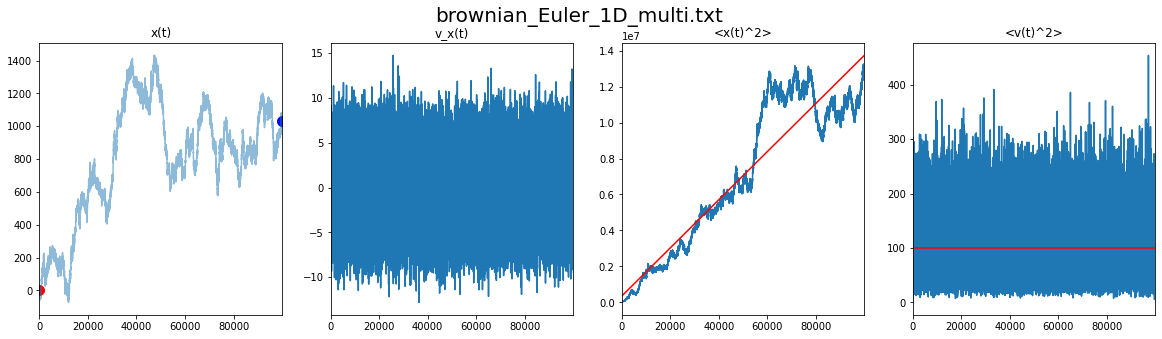

In [176]:
# Use euler method
from numpy import random

dt = 1 #time interval
t = np.arange(0,100000,dt) # total step
m = 0.1 #mass
zeta = 0.1 #zeta
rep = 10

file_name = "brownian_Euler_1D_multi.txt"

xf = np.zeros(len(t)); # x array create
vxf = np.zeros(len(t))
dsqf = np.zeros(len(t))
v2f = np.zeros(len(t))
def velocity(x, v):
    vel = -zeta/m*v + random.randn()/m
    return vel
    
def position(x,v):
    pos = v
    return pos

save = open(f"{data}/{file_name}","w+")

for r in range(rep):
    x = np.zeros(len(t)); # x array create
    vx = np.zeros(len(t))
    dsq = np.zeros(len(t))
    v2 = np.zeros(len(t))
    for i in range(len(t)-1):
        vx[i+1] = vx[i] + velocity(x[i],vx[i])*dt
        x[i+1] = x[i] + position(x[i],vx[i])*dt
        dsq[i+1] = x[i+1]**2
        v2[i+1] = vx[i+1]**2

        vxf[i+1] += vx[i+1]/rep
        xf[i+1] += x[i+1]/rep
        dsqf[i+1] += dsq[i+1]/rep
        v2f[i+1] += v2[i+1]/rep


for i in range(len(t)):
    save.write(f"{t[i]}\t{xf[i]:.4f}\t{vxf[i]:.4f}\t{dsqf[i]:.4f}\t{v2f[i]:.4f}\n")
    
save.close()

brownian_display_1D(t,xf,vxf,dsqf,v2f,file_name)

### RK4 method

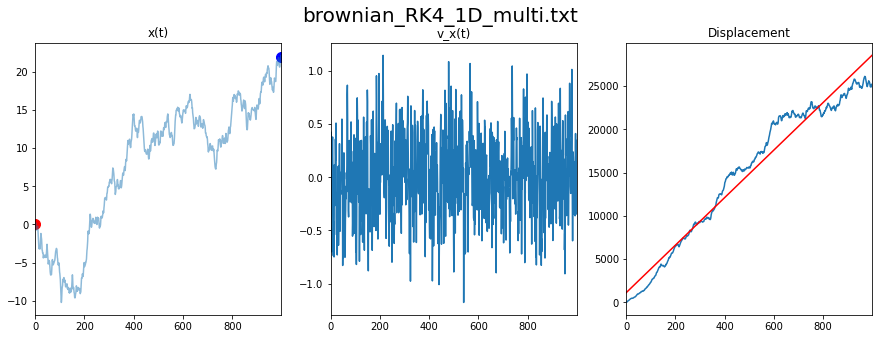

In [128]:
# Use RK4 method
from numpy import random

dt = 1 #time interval
t = np.arange(0,1000,dt) # total step
m = 0.1 #mass
zeta = 0.1 #zeta
rep = 100

file_name = "brownian_RK4_1D_multi.txt"

xf = np.zeros(len(t)); # x array create
vxf = np.zeros(len(t))
dsqf = np.zeros(len(t))

def velocity(x, v):
    vel = -zeta/m*v + random.randn()/m
    return vel
    
def position(x,v):
    pos = v
    return pos

save = open(f"{data}/{file_name}","w+")

for r in range(rep):
    x = np.zeros(len(t)); # x array create
    vx = np.zeros(len(t))
    dsq = np.zeros(len(t))
    for i in range(len(t)-1):
        k1 = dt*velocity(x[i],vx[i]) # k1 = dx*f(xn,yn,zn)
        l1 = dt*position(x[i],vx[i]) # k1 = dx*f(xn,yn,zn)
        k2 = dt*velocity(x[i]+l1/2,vx[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
        l2 = dt*position(x[i]+l1/2,vx[i]+k1/2) # k2 = dx *f(xn+dx/2,yn+k1/2,zn+l1/2)
        k3 = dt*velocity(x[i]+l2/2,vx[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
        l3 = dt*position(x[i]+l2/2,vx[i]+k2/2) # k3 = dx *f(xn+dx/2,yn+k2/2,zn+l2/2)
        k4 = dt*velocity(x[i]+l3,vx[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
        l4 = dt*position(x[i]+l3,vx[i]+k3) # k4 = dx * f(xn+dx,yn+k3,zn+l3)
        vx[i+1] = vx[i] + (k1+2*k2+2*k3+k4)/6
        x[i+1] = x[i] + (l1+2*l2+2*l3+l4)/6
        dsq[i+1] = x[i+1]**2

        vxf[i+1] += vx[i+1]/rep
        xf[i+1] += x[i+1]/rep
        dsqf[i+1] += dsq[i+1]/rep


for i in range(len(t)):
    save.write(f"{t[i]}\t{xf[i]:.4f}\t{vxf[i]:.4f}\t{dsqf[i]:.4f}\n")
    
save.close()

brownian_display_1D(t,xf,vxf,dsqf,file_name)

## 1D ~ 3D source code

[reference](https://people.sc.fsu.edu/~jburkardt/py_src/brownian_motion_simulation/brownian_motion_simulation.html)

Wed Jan 26 08:44:11 2022

BROWNIAN_MOTION_SIMULATION_TEST
  Python version
  Test the BROWNIAN_MOTION_SIMULATION library.


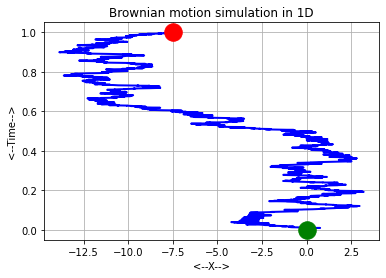


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/motion_1d.png".


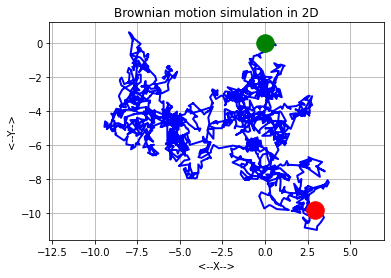


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/motion_2d.png".


<Figure size 432x288 with 0 Axes>

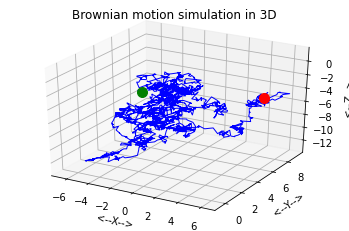


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/motion_3d.png".


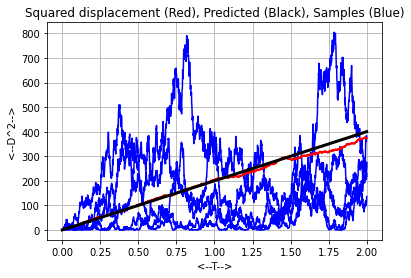


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/displacement_1.png".


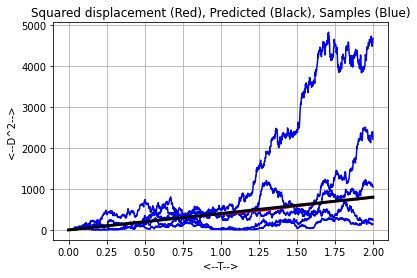


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/displacement_2.png".


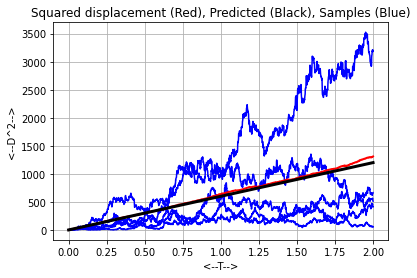


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/displacement_3.png".

BROWNIAN_MOTION_SIMULATION_TEST
  Normal end of execution.
Wed Jan 26 08:45:06 2022


<Figure size 432x288 with 0 Axes>

In [178]:

def brownian_displacement_display ( k, n, m, d, t, dsq ):
#*****************************************************************************
## BROWNIAN_DISPLACEMENT_DISPLAY displays average Brownian motion displacementdt
#
#  Parameters:
#    Input, integer K, the number of repetitions.
#    Input, integer N, the number of time steps.  
#    Input, integer M, the spatial dimension.
#    Input, real D, the diffusion coefficient.
#    Input, real T, the total time.
#    Input, real DSQ(K,N), the displacements over time for each repetition.
#
#  Get the T values.
#
  tvec = np.linspace ( 0, t, n )
#
#  Select 5 random trajectories for display.
#
  for s in range ( 0, 5 ):
    i = int ( k * np.random.rand ( 1 ) )
    plt.plot ( tvec, dsq[i,:], 'b-' )
#
#  Display the average displacement.
#
  dsq_ave = np.sum ( dsq, 0 ) / float ( k )
  plt.plot ( tvec, dsq_ave, 'r-', linewidth = 2 )
#
#  Display the ideal displacment.
#
  dsq_ideal = 2.0 * m * d * tvec
  plt.plot ( tvec, dsq_ideal, 'k-', linewidth = 3 )

  plt.grid ( True )
  plt.xlabel ( '<--T-->' )
  plt.ylabel ( '<--D^2-->' )
  plt.title ( 'Squared displacement (Red), Predicted (Black), Samples (Blue)' )

  filename = 'displacement_' + str ( m ) + '.png'
  plt.savefig ( f"{data}/{filename}" )
  plt.show ( )
  plt.clf ( )

  print ( '' )
  print ( '  Plot saved as "%s/%s".' % (data ,filename ) )

  return

def brownian_displacement_simulation ( k = 20, n = 1001, m = 2, d = 10.0, \
  t = 1.0 ):

#*****************************************************************************
## BROWNIAN_DISPLACEMENT_SIMULATION simulates Brownian displacement.
#  Parameters:
#    Input, integer K, the number of repetitions.
#    The default is 20
#    Input, integer N, the number of time steps to take, plus 1.
#    This might be 1001.
#    Input, integer M, the spatial dimension.  Typically, this is 2.
#    Input, real D, the diffusion coefficient.  This might be 10.0.
#    Computationally, this is simply a scale factor between time and space.
#    Input, real T, the total time, which defaults to 1.0.
#    Output, real DSQ(K,N), the displacements over time for each repetition.
#    DSQ(:,1) is 0.0, because we include the displacement at the initial time. 
#
  dsq = np.zeros ( [ k, n ] )

  for i in range ( 0, k ):

    x = brownian_motion_simulation ( m, n, d, t )
    dsq[i,0:n] = np.sum ( x[0:m,0:n] ** 2, 0 )
    
  return dsq

def brownian_motion_display ( m, n, x ):
#*****************************************************************************
## BROWNIAN_MOTION_DISPLAY displays successive Brownian motion positions.
#
#  Parameters:
#    Input, integer M, the spatial dimension.
#    M should be 1, 2 or 3.
#    Input, integer N, the number of time steps. 
#    Input, real X(M,N), the particle positions.
#
  if ( m == 1 ):
    y = np.linspace ( 0, n - 1, n ) / float ( n - 1 )
    plt.plot ( x[0,:], y[:], 'b', linewidth = 2 )
    plt.plot ( x[0,0], y[0], 'g.', markersize = 35 )
    plt.plot ( x[0,n-1], y[n-1], 'r.', markersize = 35 )
    plt.grid ( True )
    plt.xlabel ( '<--X-->' )
    plt.ylabel ( '<--Time-->' )
    plt.title ( 'Brownian motion simulation in 1D' )
    filename = 'motion_' + str ( m ) + 'd.png'
    plt.savefig (f"{data}/{filename}" )
    plt.show ( )
    plt.clf ( )

  elif ( m == 2 ):
    plt.plot ( x[0,:], x[1,:], 'b', LineWidth = 2 )
    plt.plot ( x[0,0], x[1,0], 'g.', markersize = 35 )
    plt.plot ( x[0,n-1], x[1,n-1], 'r.', markersize = 35 )
    plt.grid ( True )
    plt.xlabel ( '<--X-->' )
    plt.ylabel ( '<--Y-->' )
    plt.title ( 'Brownian motion simulation in 2D' )
    plt.axis ( 'equal' )
    filename = 'motion_' + str ( m ) + 'd.png'
    plt.savefig ( f"{data}/{filename}" )
    plt.show ( )
    plt.clf ( )
#
#  May I just say that I am struck by the inconsistency between 2D and 3D 
#  plotting?
#
  elif ( m == 3 ):
    fig = plt.figure ( )
    ax = fig.add_subplot ( 111, projection = '3d' )
    ax.plot ( x[0,:], x[1,:], x[2,:], 'b', linewidth = 1 )
    ax.scatter ( x[0,0], x[1,0], x[2,0], c = 'g', marker = 'o', s = 100 )
    ax.scatter ( x[0,n-1], x[1,n-1], x[2,n-1], c = 'r', marker = 'o', s = 100 ) 
    ax.grid ( True )
    ax.set_xlabel ( '<--X-->' )
    ax.set_ylabel ( '<--Y-->' )
    ax.set_zlabel ( '<--Z-->' )
    plt.title ( 'Brownian motion simulation in 3D' )
#   plt.axis ( 'equal' )
    filename = 'motion_' + str ( m ) + 'd.png'
    plt.savefig ( f"{data}/{filename}" )
    plt.show ( block = False )
    plt.clf ( )

  else:
    print ( '' )
    print ( 'BROWNIAN_MOTION_DISPLAY - Fatal error!' )
    print ( '  Cannot display data except for M = 1, 2, 3.' )
    exit ( 'BROWNIAN_MOTION_DISPLAY - Fatal error!' )

  print ( '' )
  print ( '  Plot saved as "%s/%s".' % (data, filename ) )

  return

def brownian_motion_simulation ( m = 2, n = 1001, d = 10.0, t = 1.0 ):
#*****************************************************************************
#
#  Parameters:
#
#    Input, integer M, the spatial dimension.
#    This defaults to 2.
#
#    Input, integer N, the number of time steps to take, plus 1. 
#    This defaults to 1001.
#
#    Input, real D, the diffusion coefficient.  
#    This defaults to 10.0.
#
#    Input, real T, the total time.
#    This defaults to 1.0
#
#    Output, real X(M,N), the initial position at time 0.0, and 
#    the N-1 successive locations of the particle.
#
#
#  Set the time step.
  dt = t / float ( n - 1 )
#
#  Compute the individual steps.
  x = np.zeros ( [ m, n ] )

  for j in range ( 1, n ):
#  S is the stepsize
    s = np.sqrt ( 2.0 * m * d * dt ) * np.random.randn ( 1 )
#
#  Direction is random.
    if ( m == 1 ):
      dx = s * np.ones ( 1 );
    else:
      dx = np.random.randn ( m )
      norm_dx = np.sqrt ( np.sum ( dx ** 2 ) )
      for i in range ( 0, m ):
        dx[i] = s * dx[i] / norm_dx
#  Each position is the sum of the previous steps.
    x[0:m,j] = x[0:m,j-1] + dx[0:m]
  return x
def brownian_motion_simulation_test ( ):

#*****************************************************************************80
#
## BROWNIAN_MOTION_SIMULATION_TEST tests the BROWNIAN_MOTION_SIMULATION library.
#
#  Licensing:
#
#    This code is distributed under the GNU LGPL license.

  print ( '' )
  print ( 'BROWNIAN_MOTION_SIMULATION_TEST' )
  print ( '  Python version' )
  print ( '  Test the BROWNIAN_MOTION_SIMULATION library.' )
#
#  Compute the path of a particle undergoing Brownian motion.
#
  for m in range ( 1, 4 ):
    n = 2001
    d = 10
    t = 5.0
    x = brownian_motion_simulation ( m, n, d, t )
    brownian_motion_display ( m, n, x )
#
#  Estimate the average displacement of the particle from the origin
#  as a function of time.
#
  for m in range ( 1, 4 ):
    k = 400
    n =  2001
    d = 100.0
    t = 2.0

    dsq = brownian_displacement_simulation ( k, n, m, d, t )
    brownian_displacement_display ( k, n, m, d, t, dsq )
#
#  Terminate.
#
  print ( '' )
  print ( 'BROWNIAN_MOTION_SIMULATION_TEST' )
  print ( '  Normal end of execution.' )
  return

def timestamp ( ):

  t = time.time ( )
  print ( time.ctime ( t ) )

  return None

if ( __name__ == '__main__' ):
  timestamp ( )
  brownian_motion_simulation_test ( )
  timestamp ( )

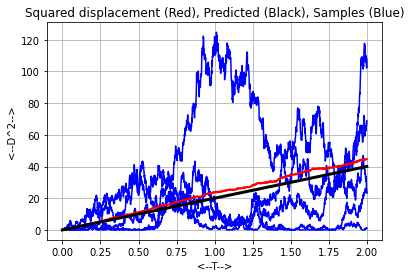


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/displacement_1.png".


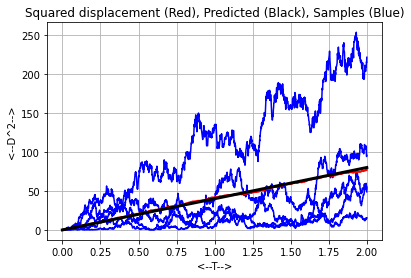


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/displacement_2.png".


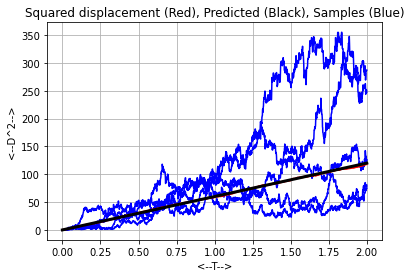


  Plot saved as "/content/drive/MyDrive/Colab Notebooks/전산 물리학/data/displacement_3.png".


<Figure size 432x288 with 0 Axes>

In [180]:
for m in range ( 1, 4 ):
    k = 400
    n =  2001
    d = 10.0
    t = 2.0

    dsq = brownian_displacement_simulation ( k, n, m, d, t )
    brownian_displacement_display ( k, n, m, d, t, dsq )